c:\Python\VisionA\carpetas\VisionArtificial\segmentacion\otsu.py:43: RuntimeWarning: invalid value encountered in scalar divide
  m_f = m/sum(f)


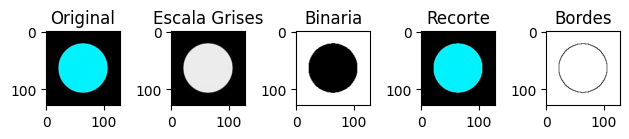

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from general import rgb2gray
from segmentacion.otsu import thresholdOtsu
from formas_binarias import detectar_bordes_binarios

image2 = cv2.imread('imagenesPruebas/circle1.png')
imgGray = rgb2gray(image2)
binary = thresholdOtsu(imgGray)
masked = np.zeros_like(image2)
bordes_detectados = detectar_bordes_binarios(binary, 3)
for i in range(image2.shape[1]):
    for j in range(image2.shape[0]):
        if 1-binary[j, i] == 0:
            masked[j, i, :] = image2[j, i, :]
fig, axs = plt.subplots(1, 5)
axs[0].imshow(image2)
axs[0].set_title("Original")
axs[1].imshow(imgGray, cmap='gray')
axs[1].set_title("Escala Grises")
axs[2].imshow(binary, cmap='binary')
axs[2].set_title("Binaria")
axs[3].imshow(masked)
axs[3].set_title("Recorte")
axs[4].imshow(bordes_detectados, 'binary')
axs[4].set_title("Bordes")
fig.tight_layout()
